# Chapter 2: What areas should the agency focus on?
Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 500
pd.options.display.max_columns = 60

sns.set()
sns.set_style('whitegrid')

In [2]:
df311_h = pd.read_pickle('df311_h.pkl')
df311_h.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude,Created DateTime,Year,Month
0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT / HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993,2020-02-02 06:09:17,2020,2
1,45527528,02/02/2020 02:27:41 AM,NaN,HEAT / HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432,2020-02-02 02:27:41,2020,2
2,45530329,02/02/2020 12:13:18 PM,NaN,HEAT / HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558,2020-02-02 12:13:18,2020,2
3,45530344,02/02/2020 07:52:08 AM,NaN,HEAT / HOT WATER,RESIDENTIAL BUILDING,10456.0,1131 MORRIS AVENUE,MORRIS AVENUE,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.831381,-73.915218,2020-02-02 07:52:08,2020,2
4,45527939,02/02/2020 09:00:54 AM,NaN,HEAT / HOT WATER,RESIDENTIAL BUILDING,11372.0,37-20 81 STREET,81 STREET,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.749320,-73.885190,2020-02-02 09:00:54,2020,2


## Data cleaning

In [3]:
# Counting and listing variables to get the correct orders of series and dataframes to enable easy charting.

# Borough:
borough_count = df311_h['Borough'].value_counts()
borough_list = borough_count.index.tolist()

# Incident Zip:
# The variable zip_count is a bit more difficult to deal with as it constantly gets converted. 
# Further processing of this data is required in order to provide a correct order of the respective values within the plots. 
# Otherwise Seaborn has trouble to handle that data correctly.
df311_h['Incident Zip'] = df311_h['Incident Zip'].fillna(0)
df311_h['Incident Zip'] = df311_h['Incident Zip'].astype(int)
df311_h['Incident Zip'] = 'Zip ' + df311_h['Incident Zip'].astype(str)
df311_h['Incident Zip'] = df311_h['Incident Zip'].replace('Zip 0', np.nan)
zip_count = df311_h['Incident Zip'].value_counts()[:10,]
zip_count = zip_count.astype('category')

zip_count = zip_count.sort_values(ascending=False)
zip_list = zip_count.index.tolist()

# Street Name:
street_count = df311_h['Street Name'].value_counts()[:10,]
street_list = street_count.index.tolist()

In [4]:
# Creating the dataframe for the development of complaints within boroughs per year.
df_borough_time = df311_h[['Unique Key', 'Borough', 'Year']]
df_borough_time_gr = df_borough_time.groupby(['Year', 'Borough']).count()['Unique Key'].unstack()
df_borough_time_gr.drop(df_borough_time_gr[df_borough_time_gr.index == 2020].index, axis=0, inplace=True)

df_borough_time_gr = df_borough_time_gr.reindex(columns=borough_list) #to get the right order for dataframe to enable correct coloring

In [5]:
# Creating the dataframe for the development of complaints within zip areas per year.
df_zip_time = df311_h[['Unique Key', 'Incident Zip', 'Year']]
df_zip_time_gr = df_zip_time.groupby(['Year', 'Incident Zip']).count()['Unique Key'].unstack()
df_zip_time_gr.drop(df_zip_time[df_zip_time.index == 2020].index, axis=0, inplace=True)
df_zip_time_gr = df_zip_time_gr[df_zip_time_gr.columns.intersection(zip_list)] #to drop all columns not in list

df_zip_time_gr = df_zip_time_gr.reindex(columns=zip_list) #to get the right order for dataframe to enable correct coloring

In [6]:
# Creating the dataframe for the development of complaints within streets per year.
df_street_time = df311_h[['Unique Key', 'Street Name', 'Year']]
df_street_time_gr = df_street_time.groupby(['Year', 'Street Name']).count()['Unique Key'].unstack()
df_street_time_gr.drop(df_street_time[df_street_time.index == 2020].index, axis=0, inplace=True)
df_street_time_gr = df_street_time_gr[df_street_time_gr.columns.intersection(street_list)] #to drop all columns not in list

df_street_time_gr = df_street_time_gr.reindex(columns=street_list) #to get the right order for dataframe to enable correct coloring

## Exploratory data analysis (EDA)

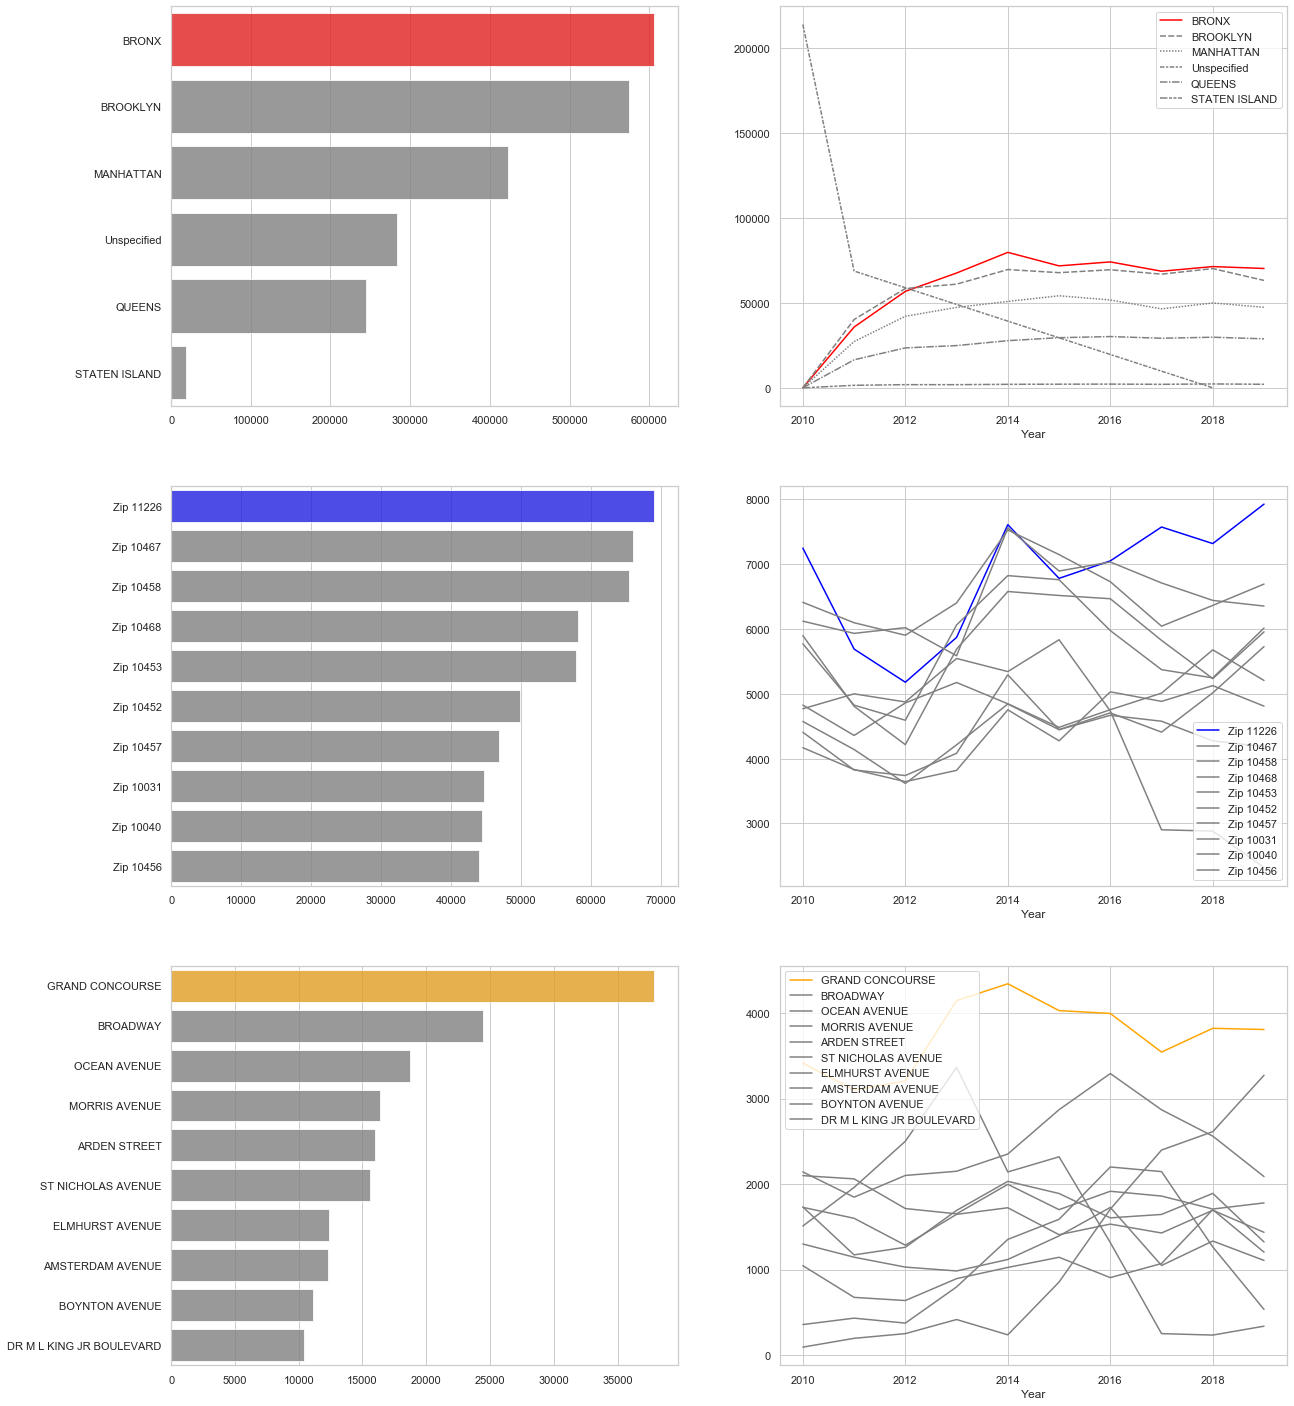

In [7]:
# Creating a plot structure to provide easy access to the total number of complaints per sub group as well as the 
# corresponding yearly development.

# Implementing 'Clrs' variables to allow proper coloring of the graphs below.
# Clearly visible distinction of the most important categories helps to focus attention to what really matters.
clrs_borough = ['grey' if (x < max(borough_count)) else 'red' for x in borough_count ]
clrs_zip = ['grey' if (x < max(zip_count)) else 'blue' for x in zip_count ]
clrs_street = ['grey' if (x < max(street_count)) else 'orange' for x in street_count ]

fig, axes = plt.subplots(3, 2, figsize=(20,25))

sns.barplot(borough_count.values, borough_count.index, alpha=0.8, palette=clrs_borough, ax=axes[0, 0])
sns.lineplot(data=df_borough_time_gr, palette=clrs_borough, ax=axes[0, 1])

sns.barplot(zip_count.values.astype(int), zip_count.index, alpha=0.8, palette=clrs_zip, orient='h', ax=axes[1, 0]) # newer Pandas version needs .astype(int) in this case
sns.lineplot(data=df_zip_time_gr, dashes=False, palette=clrs_zip, ax=axes[1, 1])

sns.barplot(street_count.values, street_count.index, alpha=0.8, palette=clrs_street, ax=axes[2, 0])
sns.lineplot(data=df_street_time_gr, dashes=False, palette=clrs_street, ax=axes[2, 1])

#### Note:

There are some clear trends in the respective comparisons. In the third comparison, however, not only Grand Concourse should be taken into account, since a second one seems to show the comparatively largest increase since 2014. We would like to show this additionally in the following, before we draw our conclusions.

In [8]:
# Identifying the street with the highest growth rate of heating complaints by checking for the second highgest number 
# of 2019 per street.
df_heat_2019 = df311_h.copy()
df_heat_2019.drop(df_heat_2019[df_heat_2019['Year'] != 2019].index, axis=0, inplace=True)
df_heat_2019 = df_heat_2019.reset_index(drop=True)

street_count_2019 = df_heat_2019['Street Name'].value_counts()[:10,]

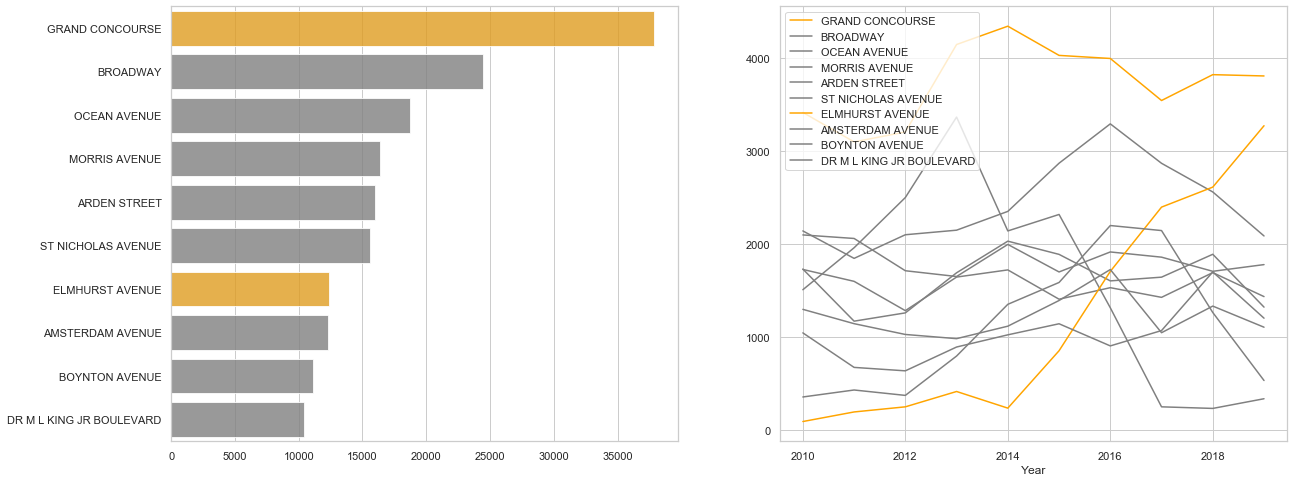

In [9]:
clrs_street_2019 = ['grey' if (x not in (street_count_2019.index[:2])) else 'orange' for x in street_count.index ] # change the iteration to hit both relevant streets

fig, axes = plt.subplots(1, 2, figsize=(20,8))

sns.barplot(street_count.values, street_count.index, alpha=0.8, palette=clrs_street_2019, ax=axes[0])
sns.lineplot(data=df_street_time_gr, dashes=False, palette=clrs_street_2019, ax=axes[1])

## Conclusion:
By far the most problematic districts are Bronx and Brooklyn, although Bronx has a slight lead here. The distribution of complaints per zip code area is less clear with 11226 (Brooklyn) at the top.

The distribution of complaints per street is led by a wide margin by Grand Concourse (Bronx), but as can be seen in the second graph, Elmhurst Avenue follows at a fast pace, although this is actually in Queens and would hardly have been detected by the other comparisons.

In the following, the Bronx district will be discussed in more detail, but it is at least important to note that other areas, such as Elmhurst Avenue in particular, should also be more closely focused by the city development department in order to plan appropriate capacities.